First we create a Simulator Class

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Harmonic oscillator simulator

class Simulator:
    def __init__(self, initial_conditions, k, mass, N_steps, dt) -> None:
        self.k = k
        self.mass = mass
        self.N_steps = N_steps
        self.dt = dt

        # Array with time and array with coordinates and derivatives
        self.t=np.arange(0,N_steps*self.dt,self.dt)
        self.u = np.zeros((N_steps, len(initial_conditions)))

        self.u[0] = np.array(initial_conditions)

        self.runge_kutta()
    

    # dot x = v
    # dot v = -kx/m
    def ODE(self, t, u): 
        dot_u = np.zeros(u.size)
        # Get coordinates and velocities from u
        x, v = u

        # Get derivatives
        dot_x = v 
        dot_v = -self.k*x/self.mass

        # Save results in dot_u
        dot_u[0] = dot_x
        dot_u[1] = dot_v
        return dot_u
    
    # Runge kutta is always the same, dont touch
    def runge_kutta(self):
        for i in range(self.N_steps-1):
            k1 = self.dt*self.ODE(self.dt*i, self.u[i])
            k2 = self.dt*self.ODE(self.dt*(i+0.5), self.u[i] + 0.5*k1)
            k3 = self.dt*self.ODE(self.dt*(i+0.5), self.u[i] + 0.5*k2)
            k4 = self.dt*self.ODE(self.dt, self.u[i] + k3)
            self.u[i+1] = self.u[i] + k1/6 + k2/3 + k3/3 + k4/6

    # Plot coordinates over time
    def plot_data_vs_time(self):
        data = np.transpose(self.u)
        plt.plot(self.t, data[0])
        plt.show()
        return

then we use the Class to plot our results

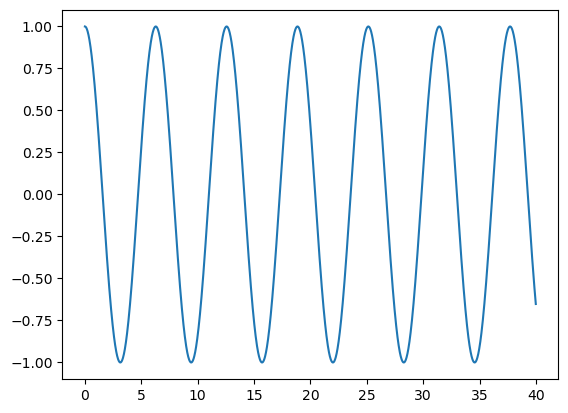

In [9]:
sim = Simulator(initial_conditions=[1, 0], k=1., mass=1., N_steps=2000, dt=0.02)
sim.plot_data_vs_time()